In [1]:
import numpy as np

def criaDatasetRegressão(n=20, slop=0.5, intercept=0.2):
    """
    Cria um dataset para regressão com função geradora com
    inclinação e interceptação do eixo vertical parametrizados.
    """
    X = np.random.uniform(size=(n,1))
    AUX = np.random.rand(n,1)-0.5
    y = X*slop+intercept + AUX*0.1
    y = y.flatten()
    return X, y

slop = 0.5
intercept = 0.2
Xtr, ytr = criaDatasetRegressão(n=20, slop=slop, intercept=intercept)
Xtr.T, ytr.T

(array([[0.41732322, 0.8372777 , 0.75320812, 0.79773881, 0.93057856,
         0.69185454, 0.89898169, 0.37643064, 0.64692467, 0.02600244,
         0.85632628, 0.92830305, 0.20514606, 0.98574094, 0.05601108,
         0.57946706, 0.25889412, 0.53922614, 0.64283212, 0.51565617]]),
 array([0.41250694, 0.6350842 , 0.60744801, 0.55996425, 0.69363386,
        0.50549969, 0.6607224 , 0.40926592, 0.48103901, 0.25298635,
        0.61040226, 0.68942296, 0.27554582, 0.6981037 , 0.23620973,
        0.47906403, 0.28993032, 0.51033268, 0.49200338, 0.44755567]))

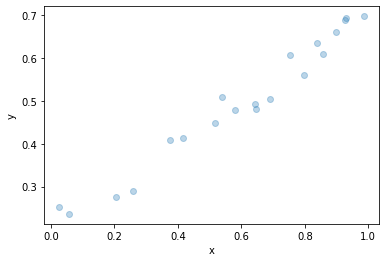

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetRegressão(X, y):
    """
    Plota um dataset de regressão.
    """
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X[:,0], y, "o", alpha=0.3)

plotaDatasetRegressão(Xtr, ytr)

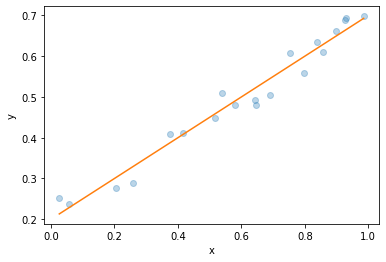

In [3]:
def plotaFunçãoDatasetRegressão(X, y, vetor, intercept=0):
    """
    Plota um dataset de regressão com uma função definida por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    xmin = min(X)
    xmax = max(X)
    xs = np.linspace(xmin, xmax, num=2)
    ys = xs * slop+intercept
    plotaDatasetRegressão(X, y)
    plt.plot(xs,ys)

plotaFunçãoDatasetRegressão(Xtr, ytr, slop, intercept)

In [4]:
def mse(yactual, ypred):
    return sum((yactual - ypred)**2)/len(yactual)

def rmse(yactual, ypred):
    return np.sqrt(mse(yactual, ypred))

0.027571806214150833
[0.19797976 0.50127839]


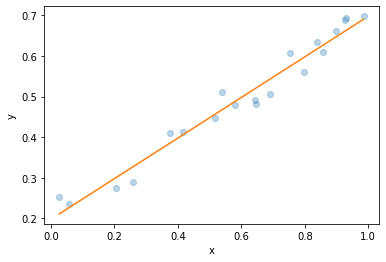

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron para regressão 
    com limite de iterações, treinado em batch, 
    com bias e taxa de aprendizado.
    """
    def __init__(self, max_iter=100, learning_rate=0.05):
        self.w = None
        self.activation = lambda a: a
        self.max_iter = max_iter
        self.learning_rate = learning_rate
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            self.w += np.matmul(Xb.T, erros) * self.learning_rate

    def predict(self, X):
        Xb = Perceptron.includebias(X)
        a = np.matmul(Xb, self.w)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(rmse(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaFunçãoDatasetRegressão(Xtr, ytr, perceptron.w[1:], perceptron.w[0])


In [6]:
Xte, yte = criaDatasetRegressão(n=1000, slop=slop, intercept=intercept)

0.02882153810142254


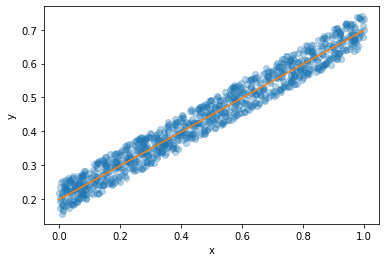

In [7]:
print(rmse(yte, perceptron.predict(Xte)))
plotaFunçãoDatasetRegressão(Xte, yte, perceptron.w[1:], perceptron.w[0])
